# Forecasting

## Apa itu Forecasting
Forecasting (atau peramalan) adalah proses untuk membuat prediksi tentang apa yang akan terjadi di masa depan dengan cara menganalisis data historis (data masa lalu) dan data saat ini.  
Tujuannya adalah untuk mengidentifikasi pola, tren, atau siklus dari data tersebut, sehingga kita bisa memperkirakan kejadian di masa depan dengan lebih akurat.  
Contoh umumnya meliputi:  
* Peramalan cuaca
* Prediksi penjualan produk di perusahaan
* Perkiraan harga saham di bursa efek

## DataUnderstanding

### Import Library  
Kode ini berfungsi untuk mengimpor semua library Python yang diperlukan untuk analisis.

In [1]:
import openeo
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import xarray as xr

ModuleNotFoundError: No module named 'openeo'

### Koneksi ke Server  
Cell ini digunakan untuk membangun koneksi ke backend openeo dan melakukan otentikasi menggunakan protokol OIDC. Langkah ini diperlukan untuk mendapatkan akses resmi ke koleksi data yang tersedia di server.

In [2]:
# Connect to openEO backend
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


### Penentuan Area dan Rentang Waktu  
Blok kode ini mendefinisikan parameter spasial (spatial extent) dan temporal (temporal extent) untuk akuisisi data. spatial_extent menentukan batas geografis area penelitian (Surabaya), sedangkan start_date dan end_date membatasi rentang waktu data yang akan diunduh.

In [5]:
# Area of Interest (AOI) - versi kamu
aoi = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          [
            [
              112.73333744680662,
              -7.213897744108465
            ],
            [
              112.73333744680662,
              -7.240796541868804
            ],
            [
              112.76429592850928,
              -7.240796541868804
            ],
            [
              112.76429592850928,
              -7.213897744108465
            ],
            [
              112.73333744680662,
              -7.213897744108465
            ]
          ]
        ],
        "type": "Polygon"
      }
    }
  ]
}

# Define spatial extent from AOI coordinates (disesuaikan juga)
spatial_extent = {
    "west": 112.73333744680662,
    "south": -7.240796541868804,
    "east": 112.76429592850928,
    "north": -7.213897744108465
}

# Rentang waktu (kamu bisa ubah sesuai kebutuhan)
start_date = "2020-10-23"
end_date = "2025-10-23"

print(f" AOI defined for coordinates: {spatial_extent}")
print(f" Time range: {start_date} to {end_date}")
print(" Setup completed successfully")


 AOI defined for coordinates: {'west': 112.73333744680662, 'south': -7.240796541868804, 'east': 112.76429592850928, 'north': -7.213897744108465}
 Time range: 2020-10-23 to 2025-10-23
 Setup completed successfully


![tampilanMiniforge1](./images/kordinat.png)

### Pengambilan dan Agregasi Data
Kode ini menginstruksikan server untuk memuat koleksi data polusi NO2 dari satelit Sentinel-5P sesuai parameter yang telah ditentukan. Fungsi aggregate_temporal_period digunakan untuk merata-ratakan data harian menjadi satu nilai tunggal per hari (period="day").

In [ ]:
print("Loading Sentinel-5P NO2 data...")

s5p_no2 = connection.load_collection(
    "SENTINEL_5P_L2",
    temporal_extent=[start_date, end_date],
    spatial_extent=spatial_extent,
    bands=["NO2"],
)

s5p_monthly = s5p_no2.aggregate_temporal_period(
    period="day",
    reducer="mean"
)

print("Data collection and aggregation configured successfully")

Loading Sentinel-5P NO2 data...
Data collection and aggregation configured successfully


### Eksekusi Proses dan Pengunduhan
Fungsi execute_batch memulai proses pengumpulan dan agregasi data di sisi server secara asynchronous. Hasil dari proses ini akan disimpan dalam sebuah file output dengan format NetCDF (.nc).

In [7]:
print("Starting data processing job...")

job = s5p_monthly.execute_batch(
    title="NO2 Averages 2020-2025", 
    outputfile="no2_averages_4years.nc"
)


Starting data processing job...
0:00:00 Job 'j-25102316381049339dfcf6a3c1e3061a': send 'start'
0:00:30 Job 'j-25102316381049339dfcf6a3c1e3061a': created (progress 0%)
0:00:36 Job 'j-25102316381049339dfcf6a3c1e3061a': created (progress 0%)
0:00:43 Job 'j-25102316381049339dfcf6a3c1e3061a': created (progress 0%)
0:00:52 Job 'j-25102316381049339dfcf6a3c1e3061a': created (progress 0%)
0:01:03 Job 'j-25102316381049339dfcf6a3c1e3061a': running (progress N/A)
0:01:16 Job 'j-25102316381049339dfcf6a3c1e3061a': running (progress N/A)
0:01:32 Job 'j-25102316381049339dfcf6a3c1e3061a': running (progress N/A)
0:01:52 Job 'j-25102316381049339dfcf6a3c1e3061a': running (progress N/A)
0:02:19 Job 'j-25102316381049339dfcf6a3c1e3061a': running (progress N/A)
0:02:50 Job 'j-25102316381049339dfcf6a3c1e3061a': running (progress N/A)
0:03:30 Job 'j-25102316381049339dfcf6a3c1e3061a': running (progress N/A)
0:04:18 Job 'j-25102316381049339dfcf6a3c1e3061a': running (progress N/A)
0:05:17 Job 'j-25102316381049339d

### Konversi dari Format .nc ke .csv
Cell ini berfungsi untuk membaca file .nc yang telah diunduh menggunakan xarray, kemudian mengonversinya ke dalam format DataFrame pandas. Hasilnya diekspor menjadi file hasil-data.csv untuk pengolahan lebih lanjut yang lebih mudah.

In [3]:
# 1. Buka file .nc Anda
# Ganti 'openEO.nc' jika nama filenya berbeda
ds = xr.open_dataset("D:\VSCode1\MatKul-psd\PSD\MataKuliah-Psd\dataset\openEO.nc", engine="h5netcdf")

# 2. Konversi dataset xarray menjadi DataFrame pandas
df = ds.to_dataframe()

# 3. [PENTING] Ratakan Multi-Index
# Data NetCDF biasanya punya banyak index (spt waktu, lat, lon).
# 'reset_index()' akan mengubah semua index itu menjadi kolom biasa.
df_flat = df.reset_index()

# 4. Simpan sebagai file CSV
df_flat.to_csv('dataset/hasil-data.csv', index=False)

print("Selesai! File 'hasil-data.csv' telah dibuat.")

Selesai! File 'hasil-data.csv' telah dibuat.


## DataPreProcessing

### Pengurutan Data Berdasarkan Waktu
Kode ini melakukan pengurutan data secara kronologis berdasarkan kolom waktu ('t'). Ini adalah langkah preprocessing yang fundamental untuk data time-series guna memastikan urutan observasi sudah benar.

In [47]:
# 1. Baca file CSV
df = pd.read_csv('./dataset/hasil-data.csv')

# 2. Ubah kolom 't' menjadi format datetime
df['t'] = pd.to_datetime(df['t'])

# 3. Urutkan DataFrame berdasarkan kolom 't'
df_sorted = df.sort_values(by='t')

# 4. Menampilkan hasil pengirutan
print(df_sorted)

print("Selesai! Data telah diurutkan berdasarkan waktu dan disimpan di './dataset/hasil-data-sorted.csv'")

              t           x         y  crs       NO2
0    2020-10-23  112.760619 -7.223435  b''       NaN
1    2020-10-24  112.760619 -7.223435  b''  0.000034
2    2020-10-25  112.760619 -7.223435  b''  0.000012
3    2020-10-26  112.760619 -7.223435  b''       NaN
4    2020-10-27  112.760619 -7.223435  b''  0.000141
...         ...         ...       ...  ...       ...
1800 2025-10-18  112.760619 -7.223435  b''  0.000026
1801 2025-10-19  112.760619 -7.223435  b''       NaN
1802 2025-10-20  112.760619 -7.223435  b''       NaN
1803 2025-10-21  112.760619 -7.223435  b''       NaN
1804 2025-10-22  112.760619 -7.223435  b''       NaN

[1805 rows x 5 columns]
Selesai! Data telah diurutkan berdasarkan waktu dan disimpan di './dataset/hasil-data-sorted.csv'


### Interpolasi untuk Mengisi Data Hilang
Langkah ini bertujuan untuk menangani nilai yang hilang (NaN) dalam data. Metode interpolasi berbasis waktu (method='time') digunakan untuk mengisi kekosongan data dengan memperkirakan nilainya berdasarkan interval waktu antara titik data yang valid.

In [48]:

df_indexed = df_sorted.set_index('t')

# 5. Lakukan interpolasi pada kolom 'NO2'
df_indexed['NO2'] = df_indexed['NO2'].interpolate(method='time')

# 6. Kembalikan 't' menjadi kolom & simpan di variabel baru
df_interpolated = df_indexed.reset_index()


# --- Konfirmasi Hasil ---
print("Selesai! Data sudah diinterpolasi dan disimpan dalam variabel 'df_interpolated'.")
print("\nCuplikan 5 baris pertama dari data hasil interpolasi:")
print(df_interpolated.head())
print(f"\nSisa missing values di kolom 'NO2': {df_interpolated['NO2'].isna().sum()}")

Selesai! Data sudah diinterpolasi dan disimpan dalam variabel 'df_interpolated'.

Cuplikan 5 baris pertama dari data hasil interpolasi:
           t           x         y  crs       NO2
0 2020-10-23  112.760619 -7.223435  b''       NaN
1 2020-10-24  112.760619 -7.223435  b''  0.000034
2 2020-10-25  112.760619 -7.223435  b''  0.000012
3 2020-10-26  112.760619 -7.223435  b''  0.000076
4 2020-10-27  112.760619 -7.223435  b''  0.000141

Sisa missing values di kolom 'NO2': 1


#### Analisis Nilai Outlier pada Data NO2

In [49]:
no2_values = df_interpolated['NO2']
q1 = no2_values.quantile(0.25)
q3 = no2_values.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_interpolated[(no2_values < lower_bound) | (no2_values > upper_bound)]

# --- Konfirmasi Hasil ---
print(f"Selesai! Ditemukan {len(outliers)} nilai outlier pada data NO2.")
# Imputasi Nilai Outlier dengan Metode Median
df_no_outliers = df_interpolated.copy()
median_no2 = df_no_outliers['NO2'].median()
df_no_outliers.loc[(df_no_outliers['NO2'] < lower_bound) | (df_no_outliers['NO2'] > upper_bound), 'NO2'] = median_no2
print("Selesai! Nilai outlier telah diimputasi dengan median NO2.")

Selesai! Ditemukan 69 nilai outlier pada data NO2.
Selesai! Nilai outlier telah diimputasi dengan median NO2.


#### Ubah data time series ke data supervised

In [29]:
# Mulai dengan DataFrame 'df_interpolated' dari langkah sebelumnya
# 1. Pilih hanya kolom waktu ('t') dan nilai ('NO2')
data = df_interpolated[['t', 'NO2']].copy()

# 2. Tentukan berapa banyak lag yang ingin Anda buat (misalnya: 3 hari sebelumnya)
N_LAGS = 3

# 3. Buat fitur lag (geser data ke bawah)
for i in range(1, N_LAGS + 1):
    data[f'NO2(t-{i})'] = data['NO2'].shift(i)

# 4. Ganti nama kolom 'NO2' asli menjadi target (y)
data.rename(columns={'NO2': 'NO2_target(t)'}, inplace=True)

# 5. Hapus baris yang mengandung NaN
# Ini adalah N_LAGS baris pertama, yang tidak memiliki data historis
data.dropna(inplace=True)

# 6. Reset index agar rapi
data.reset_index(drop=True, inplace=True)

# 7. Simpan hasil akhir ke variabel baru 'df_supervised'
df_supervised = data

# 8. Tampilkan hasilnya
print(f"Selesai! DataFrame 'df_supervised' telah dibuat dengan {N_LAGS} lag features.")
print("\nCuplikan 5 baris pertama dari data supervised:")
print(df_supervised.head())

Selesai! DataFrame 'df_supervised' telah dibuat dengan 3 lag features.

Cuplikan 5 baris pertama dari data supervised:
           t  NO2_target(t)  NO2(t-1)  NO2(t-2)  NO2(t-3)
0 2020-10-27       0.000141  0.000076  0.000012  0.000034
1 2020-10-28       0.000021  0.000141  0.000076  0.000012
2 2020-10-29       0.000027  0.000021  0.000141  0.000076
3 2020-10-30       0.000033  0.000027  0.000021  0.000141
4 2020-10-31       0.000039  0.000033  0.000027  0.000021


### Normalisasi Data (Z-Score)
Normalisasi data dilakukan menggunakan StandardScaler (Z-score). Tujuannya adalah untuk mengubah skala semua fitur sehingga memiliki rata-rata 0 dan standar deviasi 1. Ini penting untuk meningkatkan performa model K-NN yang sensitif terhadap skala data.

In [30]:
from sklearn.preprocessing import StandardScaler

# Pisahkan kolom fitur (X) dan target (y)
features_cols = [col for col in df_supervised.columns if col.startswith('NO2(t-')]
target_col = ['NO2_target(t)']

# Buat scaler terpisah untuk fitur dan target
feature_scaler_z = StandardScaler()
target_scaler_z = StandardScaler()

# Buat salinan DataFrame
df_scaled_z = df_supervised.copy()

# Fit dan transform fitur
df_scaled_z[features_cols] = feature_scaler_z.fit_transform(df_scaled_z[features_cols])
# Fit dan transform target
df_scaled_z[target_col] = target_scaler_z.fit_transform(df_scaled_z[target_col])

print(df_scaled_z.head())

           t  NO2_target(t)  NO2(t-1)  NO2(t-2)  NO2(t-3)
0 2020-10-27       2.632705  0.777916 -1.075534 -0.453106
1 2020-10-28      -0.807283  2.631791  0.777985 -1.075738
2 2020-10-29      -0.634412 -0.808062  2.631504  0.777914
3 2020-10-30      -0.461540 -0.635197 -0.807688  2.631567
4 2020-10-31      -0.288668 -0.462332 -0.634856 -0.807873


## Model K-NN

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

#### Explorasi Data

In [32]:
# Menggunakan DataFrame 'df_scaled_z' yang sudah dinormalisasi (Z-Score)

print("--- 1. Informasi Tipe Data & Non-Null ---")
# .info() akan mencetak ringkasan DataFrame
df_scaled_z.info()

print("\n--- 2. Deskripsi Statistik ---")
# .describe() akan memberikan statistik deskriptif
print(df_scaled_z.describe())

print("\n--- 3. Pengecekan Missing Values ---")
# .isna().sum() akan menghitung jumlah nilai NaN di setiap kolom
print(df_scaled_z.isna().sum())

--- 1. Informasi Tipe Data & Non-Null ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   t              1801 non-null   datetime64[ns]
 1   NO2_target(t)  1801 non-null   float64       
 2   NO2(t-1)       1801 non-null   float64       
 3   NO2(t-2)       1801 non-null   float64       
 4   NO2(t-3)       1801 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 70.5 KB

--- 2. Deskripsi Statistik ---
                                   t  NO2_target(t)      NO2(t-1)  \
count                           1801   1.801000e+03  1.801000e+03   
mean   2023-04-29 03:22:17.257079552   8.679589e-17 -1.025770e-16   
min              2020-10-27 00:00:00  -1.813298e+00 -1.814037e+00   
25%              2022-01-31 00:00:00  -6.488710e-01 -6.475437e-01   
50%              2023-04-30 00:00:00  -3.059525e-01 -3.065

#### Persiapan Data untuk Modelling

In [33]:
# Kita menggunakan DataFrame 'df_scaled_z' (hasil Z-Score)

# 1. Identifikasi Kolom Fitur (X)
# Ini adalah variabel prediktor (data historis)
feature_columns = [col for col in df_scaled_z.columns if col.startswith('NO2(t-')]

# 2. Identifikasi Kolom Target (y)
# Ini adalah variabel yang ingin diprediksi (data saat ini)
target_column = 'NO2_target(t)'

# 3. Buat variabel X dan y
# X (biasanya huruf besar) adalah DataFrame yang berisi semua fitur
X = df_scaled_z[feature_columns]

# y (biasanya huruf kecil) adalah Series yang berisi target
y = df_scaled_z[target_column]

# 4. Tampilkan konfirmasi
print("--- Variabel Fitur (X) ---")
print(f"Kolom yang digunakan: {feature_columns}")
print(X.head())

print("\n--- Variabel Target (y) ---")
print(f"Kolom yang digunakan: {target_column}")
print(y.head())

--- Variabel Fitur (X) ---
Kolom yang digunakan: ['NO2(t-1)', 'NO2(t-2)', 'NO2(t-3)']
   NO2(t-1)  NO2(t-2)  NO2(t-3)
0  0.777916 -1.075534 -0.453106
1  2.631791  0.777985 -1.075738
2 -0.808062  2.631504  0.777914
3 -0.635197 -0.807688  2.631567
4 -0.462332 -0.634856 -0.807873

--- Variabel Target (y) ---
Kolom yang digunakan: NO2_target(t)
0    2.632705
1   -0.807283
2   -0.634412
3   -0.461540
4   -0.288668
Name: NO2_target(t), dtype: float64


#### Bagi data Training dan Testing

In [34]:
# Menggunakan X dan y dari langkah sebelumnya

# 1. Tentukan ukuran data latih (misal: 80% dari total data)
# 'int()' untuk membulatkan ke angka terdekat
train_size = int(len(X) * 0.8)

# 2. Bagi data X (fitur)
X_train = X.iloc[0:train_size]
X_test = X.iloc[train_size:len(X)]

# 3. Bagi data y (target)
y_train = y.iloc[0:train_size]
y_test = y.iloc[train_size:len(y)]

t_test = df_supervised['t'].iloc[train_size:len(df_supervised)]

# 4. Tampilkan konfirmasi
print(f"Total data: {len(X)} baris")
print(f"Jumlah data Latih (Train): {len(X_train)} baris (80%)")
print(f"Jumlah data Uji (Test): {len(X_test)} baris (20%)")

print("\n--- X_train (cuplikan 5 baris terakhir) ---")
print(X_train.tail())
print("\n--- X_test (cuplikan 5 baris pertama) ---")
print(X_test.head())

Total data: 1801 baris
Jumlah data Latih (Train): 1440 baris (80%)
Jumlah data Uji (Test): 361 baris (20%)

--- X_train (cuplikan 5 baris terakhir) ---
      NO2(t-1)  NO2(t-2)  NO2(t-3)
1435  0.011502 -0.485443  0.872568
1436  0.508758  0.011718 -0.485605
1437  1.006015  0.508879  0.011592
1438  1.503272  1.006041  0.508789
1439 -0.580988  1.503202  1.005986

--- X_test (cuplikan 5 baris pertama) ---
      NO2(t-1)  NO2(t-2)  NO2(t-3)
1440  4.412190 -0.580658  1.503183
1441  3.177861  4.411560 -0.580826
1442 -0.138318  3.177469  4.411751
1443 -0.620364 -0.138072  3.177571
1444  0.689476 -0.620026 -0.138209


### Pelatihan Model K-NN
Cell ini menginisialisasi model K-NN Regressor dan melatihnya menggunakan data latih (X_train dan y_train). Proses .fit() adalah saat model mempelajari pola dari data.

In [35]:
# --- 2. Training Model kNN ---
# Inisialisasi model (k=5)
k = 5
knn_model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)

# Training model menggunakan data latih
knn_model.fit(X_train, y_train)

print(f"\nSelesai! Model kNN Regression (k={k}) telah berhasil di-training.")
print("Model disimpan dalam variabel 'knn_model'.")


Selesai! Model kNN Regression (k=5) telah berhasil di-training.
Model disimpan dalam variabel 'knn_model'.


### Pelaksanaan Prediksi
Model yang telah dilatih digunakan untuk membuat prediksi pada data uji (X_test). Hasil prediksi dari model disimpan dalam variabel y_pred.

In [36]:
y_pred = knn_model.predict(X_test)

# --- 5. Tampilkan Hasil ---
print("\nSelesai! Prediksi data test telah dibuat.")
print("Hasil prediksi disimpan dalam variabel 'y_pred'.")
print("\nCuplikan 5 hasil prediksi pertama (y_pred):")
print(y_pred[0:5])


Selesai! Prediksi data test telah dibuat.
Hasil prediksi disimpan dalam variabel 'y_pred'.

Cuplikan 5 hasil prediksi pertama (y_pred):
[ 2.22213342  2.83794007  2.6361297  -0.43122561 -0.03089162]


### Evaluasi Model
Cell ini bertujuan untuk mengukur performa model prediksi. Hasil prediksi (y_pred_orig) dibandingkan dengan data aktual (y_test_orig) menggunakan beberapa metrik evaluasi: MAE, MSE, dan RMSE. Nilai metrik yang lebih rendah mengindikasikan tingkat akurasi model yang lebih tinggi.

In [37]:
# Mengembalikan nilai ke skala asli (unit NO2)
y_test_reshaped = y_test.values.reshape(-1, 1)
y_pred_reshaped = y_pred.reshape(-1, 1)

y_test_orig = target_scaler_z.inverse_transform(y_test_reshaped)
y_pred_orig = target_scaler_z.inverse_transform(y_pred_reshaped)

# Hitung Metrik Evaluasi
mae = mean_absolute_error(y_test_orig, y_pred_orig)
mse = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)

# --- 9. TAMPILKAN OUTPUT SEPERTI GAMBAR ---
print("--- Evaluasi Model ---")
print(f"MAE:  {mae}")
print(f"MSE:  {mse}")
print(f"RMSE: {rmse}")

--- Evaluasi Model ---
MAE:  1.2815399723937635e-05
MSE:  4.4110475870925105e-10
RMSE: 2.100249410687338e-05


### Visualisasi dan Analisis Residual

Membuat visualisasi perbandingan...


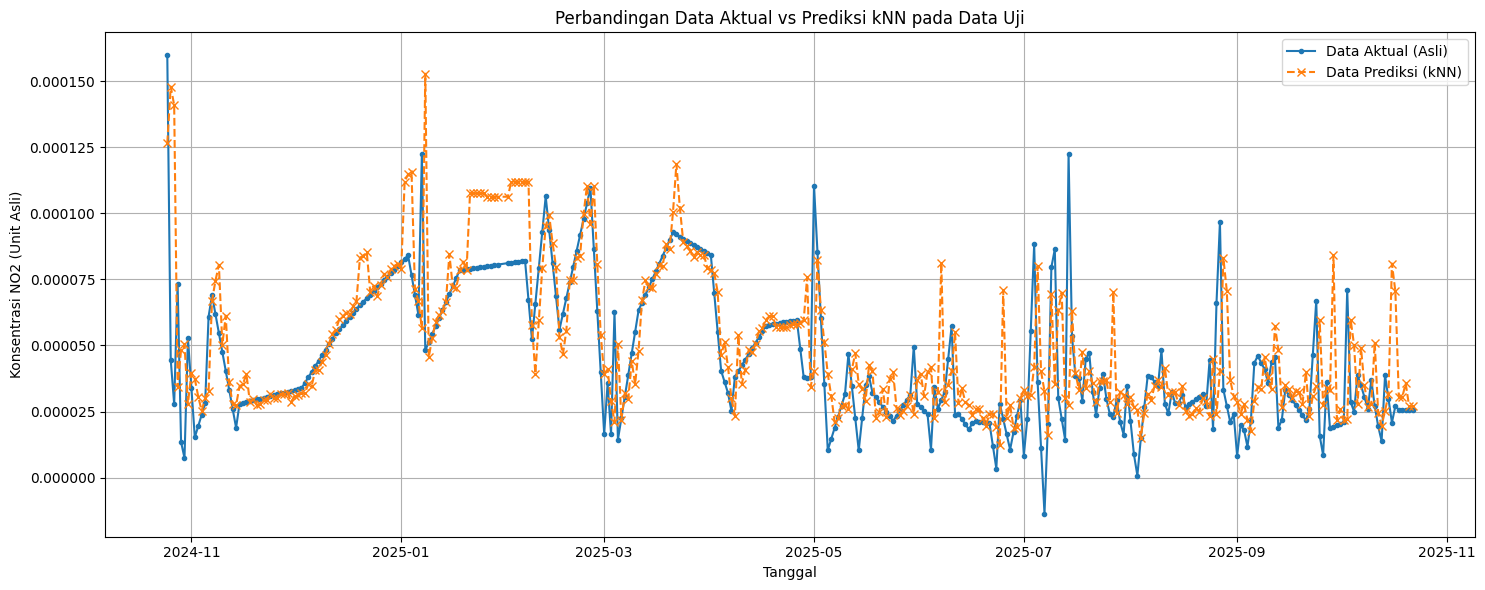

In [38]:
print("Membuat visualisasi perbandingan...")

plt.figure(figsize=(15, 6))
plt.plot(t_test, y_test_orig, label='Data Aktual (Asli)', marker='.', linestyle='-')
plt.plot(t_test, y_pred_orig, label='Data Prediksi (kNN)', marker='x', linestyle='--')
plt.title('Perbandingan Data Aktual vs Prediksi kNN pada Data Uji')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi NO2 (Unit Asli)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Membuat visualisasi analisis residual...

--- Metrik Residual ---
Mean Residual: -5.076701715307718e-06
Std Dev Residual: 2.0379692303934394e-05
Catatan: Mean residual yang mendekati 0 adalah pertanda baik.


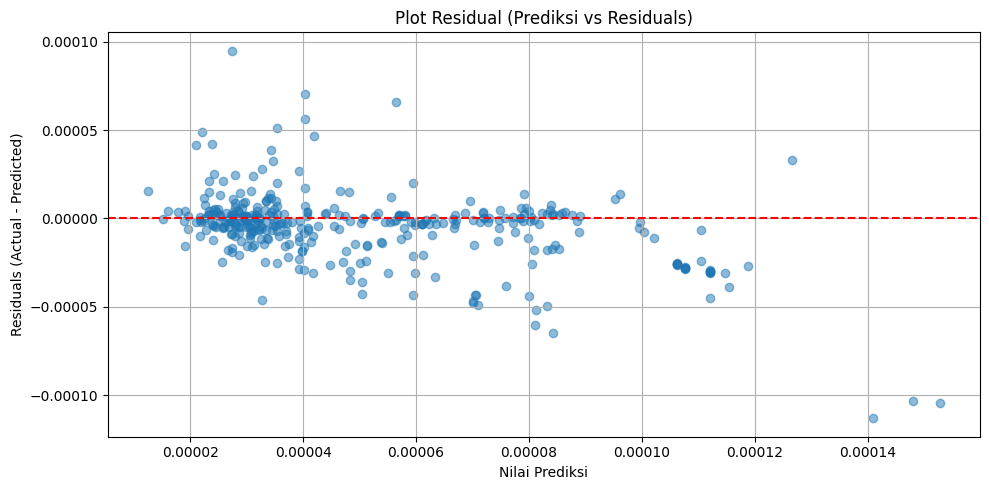

In [39]:
print("Membuat visualisasi analisis residual...")

# A. Hitung Residuals (Actual - Predicted)
residuals = y_test_orig.flatten() - y_pred_orig.flatten()

# B. Hitung Mean dan Std Residual (Permintaan Baru Anda)
mean_resid = residuals.mean()
std_resid = residuals.std()

print("\n--- Metrik Residual ---")
print(f"Mean Residual: {mean_resid}")
print(f"Std Dev Residual: {std_resid}")
print("Catatan: Mean residual yang mendekati 0 adalah pertanda baik.")

# C. Buat Plot Residual (Scatter Plot)
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_orig, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Plot Residual (Prediksi vs Residuals)')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.tight_layout()

### Eksperimen (Pencarian K Optimal)
Ini adalah implementasi dari tahap eksperimen. Kode ini melakukan iterasi untuk melatih dan mengevaluasi model K-NN dengan nilai 'K' yang berbeda (dari 1 hingga 30). Tujuannya adalah untuk menemukan nilai K yang menghasilkan RMSE terendah menggunakan "Elbow Method".

Memulai pencarian K optimal...
k = 1, RMSE = 3.425704172415043e-05
k = 2, RMSE = 2.4867862639090725e-05
k = 3, RMSE = 2.2700460490169352e-05
k = 4, RMSE = 2.1608396987650907e-05
k = 5, RMSE = 2.100249410687338e-05
k = 6, RMSE = 1.9851778344371008e-05
k = 7, RMSE = 1.909764531409078e-05
k = 8, RMSE = 1.839893004046895e-05
k = 9, RMSE = 1.8075525958698976e-05
k = 10, RMSE = 1.8346293442185695e-05
k = 11, RMSE = 1.7887905803184348e-05
k = 12, RMSE = 1.7704967119048564e-05
k = 13, RMSE = 1.7546974200482384e-05
k = 14, RMSE = 1.743032827636376e-05
k = 15, RMSE = 1.7233120620685612e-05
k = 16, RMSE = 1.715573715007244e-05
k = 17, RMSE = 1.7051108817438472e-05
k = 18, RMSE = 1.6884535917763142e-05
k = 19, RMSE = 1.682945788547279e-05
k = 20, RMSE = 1.6791802603308425e-05
k = 21, RMSE = 1.6744029277256e-05
k = 22, RMSE = 1.6727503585335725e-05
k = 23, RMSE = 1.6691075472993462e-05
k = 24, RMSE = 1.6631752873141245e-05
k = 25, RMSE = 1.6654625897634607e-05
k = 26, RMSE = 1.657179077937506e-05
k

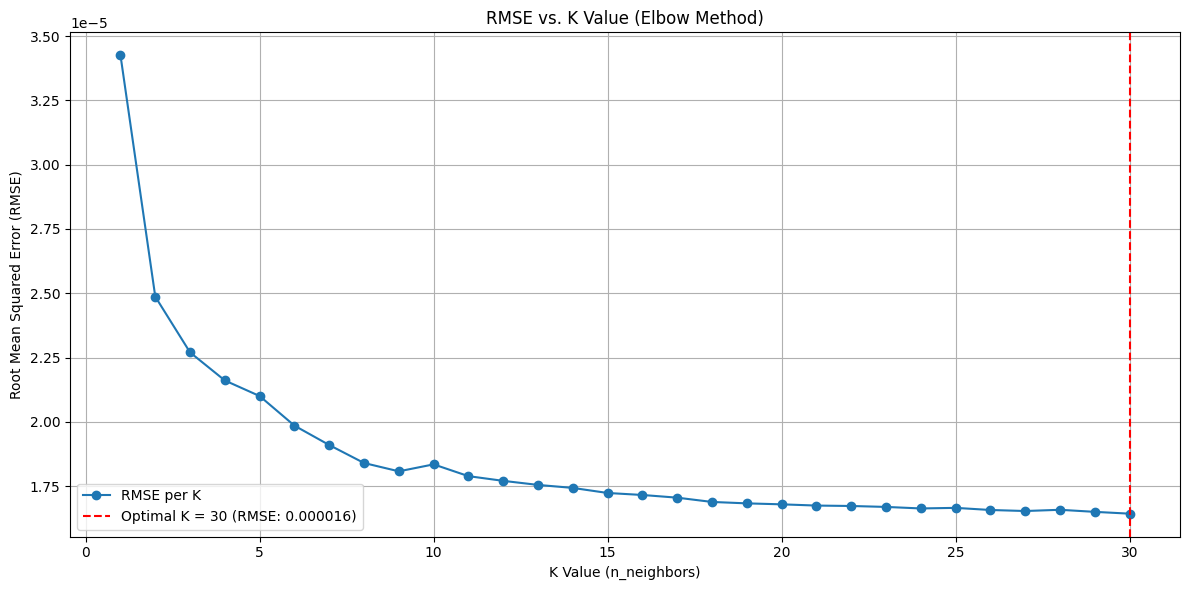

In [40]:
print("Memulai pencarian K optimal...")
rmse_values = [] # Untuk menyimpan nilai RMSE
range_k = range(1, 31) # Kita akan tes K dari 1 sampai 30

# Mengembalikan y_test ke skala asli (hanya perlu sekali)
y_test_orig = target_scaler_z.inverse_transform(y_test.values.reshape(-1, 1))

for k in range_k:
    # 1. Training model dengan K saat ini
    knn_model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    knn_model.fit(X_train, y_train)
    
    # 2. Prediksi data test
    y_pred = knn_model.predict(X_test)
    
    # 3. Kembalikan prediksi ke skala asli
    y_pred_orig = target_scaler_z.inverse_transform(y_pred.reshape(-1, 1))
    
    # 4. Hitung RMSE
    rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
    
    # 5. Simpan RMSE
    rmse_values.append(rmse)
    print(f"k = {k}, RMSE = {rmse}")

print("Pencarian K selesai.")

# --- 7. Cari K Terbaik ---
best_rmse = min(rmse_values)
# +1 karena index list mulai dari 0, tapi K kita mulai dari 1
best_k = rmse_values.index(best_rmse) + 1

print("\n--- HASIL K-OPTIMAL ---")
print(f"Nilai K terbaik adalah: {best_k}")
print(f"Dengan nilai RMSE terendah: {best_rmse}")

# --- 8. Visualisasi Elbow Method ---
plt.figure(figsize=(12, 6))
plt.plot(range_k, rmse_values, marker='o', linestyle='-', label='RMSE per K')
plt.title('RMSE vs. K Value (Elbow Method)')
plt.xlabel('K Value (n_neighbors)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
# Tandai K terbaik
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Optimal K = {best_k} (RMSE: {best_rmse:.6f})')
plt.legend()
plt.tight_layout()

#### Training dan Evaluasi Model dengan K Optimal

Memulai pencarian K optimal...
k = 1, RMSE = 3.425704172415043e-05
k = 2, RMSE = 2.4867862639090725e-05
k = 3, RMSE = 2.2700460490169352e-05
k = 4, RMSE = 2.1608396987650907e-05
k = 5, RMSE = 2.100249410687338e-05
k = 6, RMSE = 1.9851778344371008e-05
k = 7, RMSE = 1.909764531409078e-05
k = 8, RMSE = 1.839893004046895e-05
k = 9, RMSE = 1.8075525958698976e-05
k = 10, RMSE = 1.8346293442185695e-05
k = 11, RMSE = 1.7887905803184348e-05
k = 12, RMSE = 1.7704967119048564e-05
k = 13, RMSE = 1.7546974200482384e-05
k = 14, RMSE = 1.743032827636376e-05
k = 15, RMSE = 1.7233120620685612e-05
k = 16, RMSE = 1.715573715007244e-05
k = 17, RMSE = 1.7051108817438472e-05
k = 18, RMSE = 1.6884535917763142e-05
k = 19, RMSE = 1.682945788547279e-05
k = 20, RMSE = 1.6791802603308425e-05
k = 21, RMSE = 1.6744029277256e-05
k = 22, RMSE = 1.6727503585335725e-05
k = 23, RMSE = 1.6691075472993462e-05
k = 24, RMSE = 1.6631752873141245e-05
k = 25, RMSE = 1.6654625897634607e-05
k = 26, RMSE = 1.657179077937506e-05
k

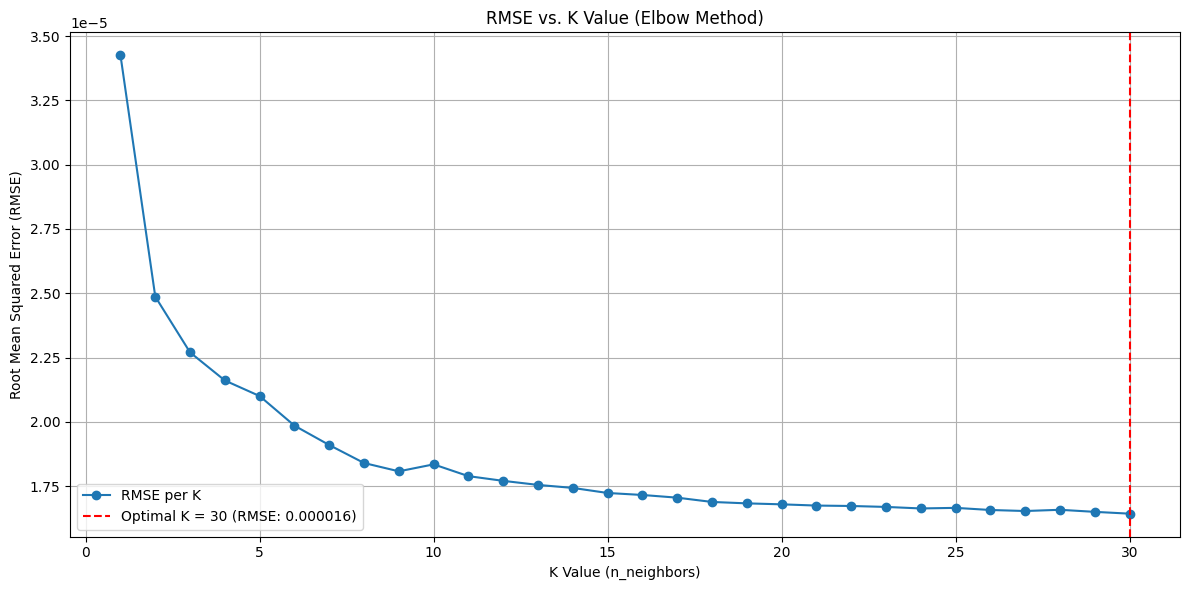

In [42]:
print("Memulai pencarian K optimal...")
rmse_values = [] # Untuk menyimpan nilai RMSE
range_k = range(1, 31) # Kita akan tes K dari 1 sampai 30

# Mengembalikan y_test ke skala asli (hanya perlu sekali)
y_test_orig = target_scaler_z.inverse_transform(y_test.values.reshape(-1, 1))

for k in range_k:
    # 1. Training model dengan K saat ini
    knn_model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    knn_model.fit(X_train, y_train)
    
    # 2. Prediksi data test
    y_pred = knn_model.predict(X_test)
    
    # 3. Kembalikan prediksi ke skala asli
    y_pred_orig = target_scaler_z.inverse_transform(y_pred.reshape(-1, 1))
    
    # 4. Hitung RMSE
    rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
    
    # 5. Simpan RMSE
    rmse_values.append(rmse)
    print(f"k = {k}, RMSE = {rmse}")

print("Pencarian K selesai.")

# --- 7. Cari K Terbaik ---
best_rmse = min(rmse_values)
# +1 karena index list mulai dari 0, tapi K kita mulai dari 1
best_k = rmse_values.index(best_rmse) + 1

print("\n--- HASIL K-OPTIMAL ---")
print(f"Nilai K terbaik adalah: {best_k}")
print(f"Dengan nilai RMSE terendah: {best_rmse}")

# --- 8. Visualisasi Elbow Method ---
plt.figure(figsize=(12, 6))
plt.plot(range_k, rmse_values, marker='o', linestyle='-', label='RMSE per K')
plt.title('RMSE vs. K Value (Elbow Method)')
plt.xlabel('K Value (n_neighbors)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
# Tandai K terbaik
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Optimal K = {best_k} (RMSE: {best_rmse:.6f})')
plt.legend()
plt.tight_layout()

### Perbandingan Akhir & Visualisasi Optimal
Cell terakhir ini menyajikan perbandingan metrik performa antara model dengan K awal (K=5) dan model dengan K optimal (K=30) untuk menunjukkan peningkatan akurasi. Grafik akhir memvisualisasikan hasil prediksi dari model yang paling optimal.

In [43]:
# --- 8. EVALUASI MODEL OPTIMAL (K=best_k) ---
print(f"\n--- 3. Evaluasi Model Optimal (K={best_k}) ---")
optimal_model = KNeighborsRegressor(n_neighbors=best_k, n_jobs=-1)
optimal_model.fit(X_train, y_train)
y_pred_optimal = optimal_model.predict(X_test)
y_pred_optimal_orig = target_scaler_z.inverse_transform(y_pred_optimal.reshape(-1, 1))

mae_optimal = mean_absolute_error(y_test_orig, y_pred_optimal_orig)
mse_optimal = mean_squared_error(y_test_orig, y_pred_optimal_orig)
rmse_optimal = np.sqrt(mse_optimal)

print(f"MAE (K={best_k}):  {mae_optimal}")
print(f"MSE (K={best_k}):  {mse_optimal}")
print(f"RMSE (K={best_k}): {rmse_optimal}")


--- 3. Evaluasi Model Optimal (K=30) ---
MAE (K=30):  1.00900858425283e-05
MSE (K=30):  2.699146573725811e-10
RMSE (K=30): 1.642907962646055e-05


In [44]:
# --- 9. PERBANDINGAN AKHIR ---
print("\n--- 4. Perbandingan Performa ---")
print(f"                       K=5 (Default)   |   K={best_k} (Optimal)")
print("---------------------------------------------------------------")
print(f"MAE:                   {mae:<15.10f} |   {mae_optimal:<15.10f}")
print(f"MSE:                   {mse:<15.10f} |   {mse_optimal:<15.10f}")
print(f"RMSE:                  {rmse:<15.10f} |   {rmse_optimal:<15.10f}")

print("\n--- Peningkatan Performa (Nilai Lebih Rendah Lebih Baik) ---")
print(f"Peningkatan MAE:  {mae - mae_optimal}")
print(f"Peningkatan MSE:  {mse - mse_optimal}")
print(f"Peningkatan RMSE: {rmse - rmse_optimal}")


--- 4. Perbandingan Performa ---
                       K=5 (Default)   |   K=30 (Optimal)
---------------------------------------------------------------
MAE:                   0.0000128154    |   0.0000100901   
MSE:                   0.0000000004    |   0.0000000003   
RMSE:                  0.0000164291    |   0.0000164291   

--- Peningkatan Performa (Nilai Lebih Rendah Lebih Baik) ---
Peningkatan MAE:  2.7253138814093353e-06
Peningkatan MSE:  1.7119010133666993e-10
Peningkatan RMSE: 0.0


Membuat visualisasi perbandingan model optimal...


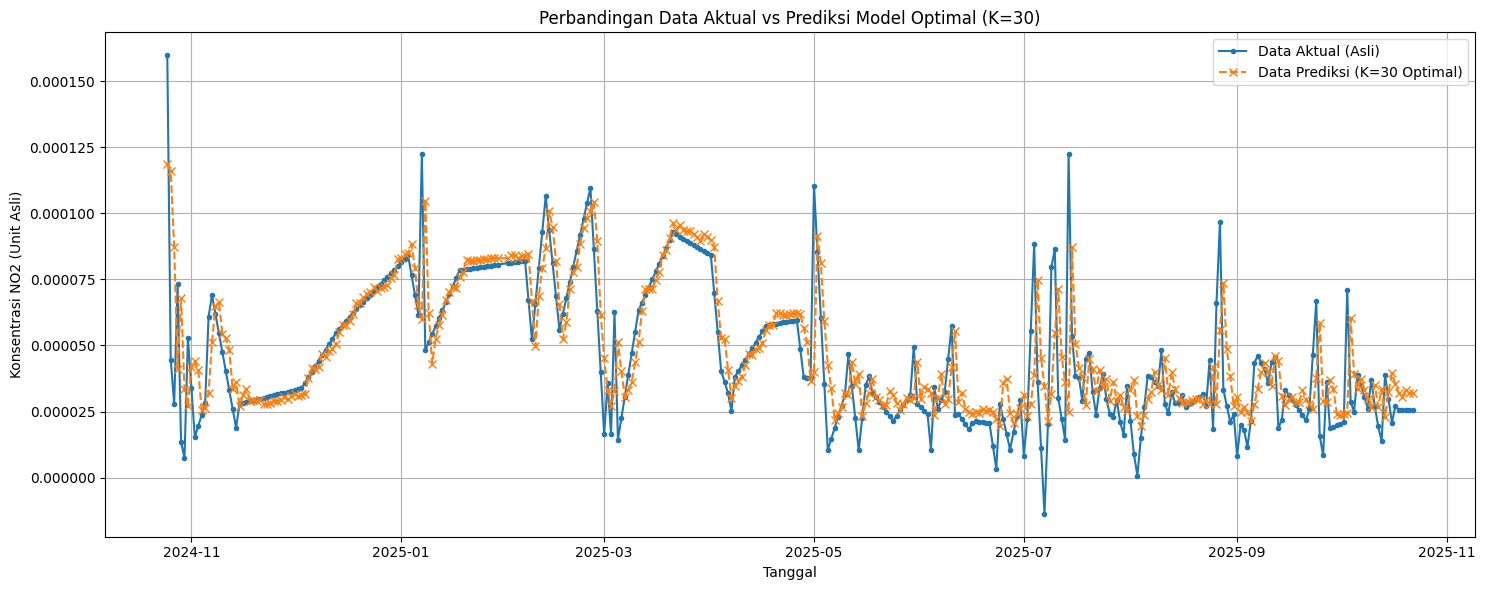

In [45]:
print("Membuat visualisasi perbandingan model optimal...")

plt.figure(figsize=(15, 6))
# Plot data aktual
plt.plot(t_test, y_test_orig, label='Data Aktual (Asli)', marker='.', linestyle='-')
# Plot data prediksi dari model optimal
plt.plot(t_test, y_pred_optimal_orig, label=f'Data Prediksi (K={best_k} Optimal)', marker='x', linestyle='--')
plt.title(f'Perbandingan Data Aktual vs Prediksi Model Optimal (K={best_k})')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi NO2 (Unit Asli)')
plt.legend()
plt.grid(True)
plt.tight_layout()
